# Explore here

In [6]:
# Imporción de la librerias a utilizar.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump


In [7]:
data_train = pd.read_csv('/workspaces/RANDOM_FOREST_ALGO_JesusCasatnedam/data/processed/train_data.csv')
data_train

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,193,25.9,0.655,24,0
1,1,143,30.1,0.892,23,0
2,1,164,32.8,0.341,50,0
3,12,84,29.7,0.297,46,1
4,10,108,32.4,0.272,42,1
...,...,...,...,...,...,...
587,1,79,32.0,0.396,22,0
588,1,89,31.2,0.192,23,0
589,2,108,27.0,0.259,52,1
590,5,86,30.2,0.364,24,0


In [8]:
data_test = pd.read_csv('/workspaces/RANDOM_FOREST_ALGO_JesusCasatnedam/data/processed/test_data.csv')
data_test

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,117,34.5,0.403,40,1
1,12,140,37.4,0.244,41,0
2,3,61,34.4,0.243,46,0
3,3,81,27.5,0.306,22,0
4,1,80,30.0,0.527,22,0
...,...,...,...,...,...,...
143,13,126,43.4,0.583,42,1
144,8,105,43.3,0.239,45,1
145,5,105,36.9,0.159,28,0
146,0,180,42.0,1.893,25,1


In [9]:
print(data_test.shape)
print(data_train.shape)

(148, 6)
(592, 6)


In [10]:
X_test = data_test.drop('Outcome', axis=1)
X_train = data_train.drop('Outcome', axis=1)
y_train = data_train['Outcome']
y_test = data_test['Outcome']

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)


(148, 5)
(592, 5)
(148,)
(592,)


### Probamos un Random Forest con 5 árboles

In [ ]:
# modelo
model = RandomForestClassifier(random_state = 16, n_estimators = 5)

# entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=16)

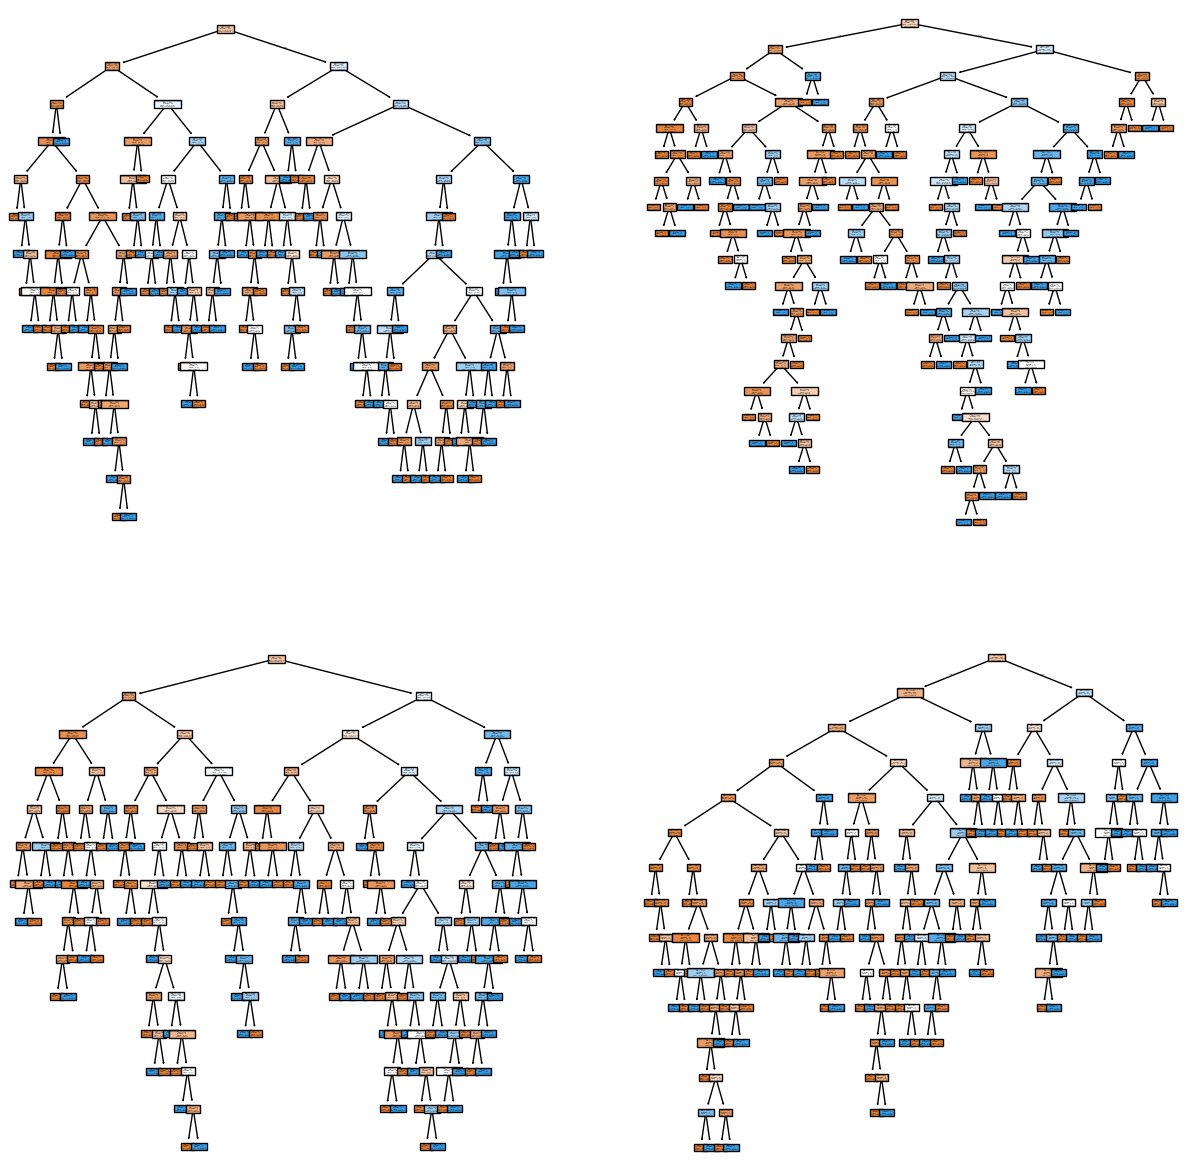

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 5 generados 
clases = ["Diabetico", "No Diabetico"]
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)

plt.show()

In [14]:
# predicción
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [15]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [17]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("\nAccuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7567567567567568
F1 score Test:  0.7567567567567568
Precision Test:  0.7567567567567568
Recall Test:  0.7567567567567568

Accuracy Train:  0.964527027027027
F1 score Train:  0.964527027027027
Precision Train:  0.964527027027027
Recall Train:  0.964527027027027


In [18]:
print(classification_report(y_test, y_pred_test, target_names=["Diabetico", "No Diabetico"]))

              precision    recall  f1-score   support

   Diabetico       0.88      0.78      0.82       108
No Diabetico       0.54      0.70      0.61        40

    accuracy                           0.76       148
   macro avg       0.71      0.74      0.72       148
weighted avg       0.78      0.76      0.77       148



In [20]:
dump(model, open("random_forest_classifier_default_16.sav", "wb"))

### Probamos un Random Forest con 200 árboles y una profundida de 5

In [29]:
# modelo
# Lo entrenamos con más arboles
second_model = RandomForestClassifier(random_state = 16, n_estimators = 200, max_depth= 5)

# entrenamiento
second_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=16)

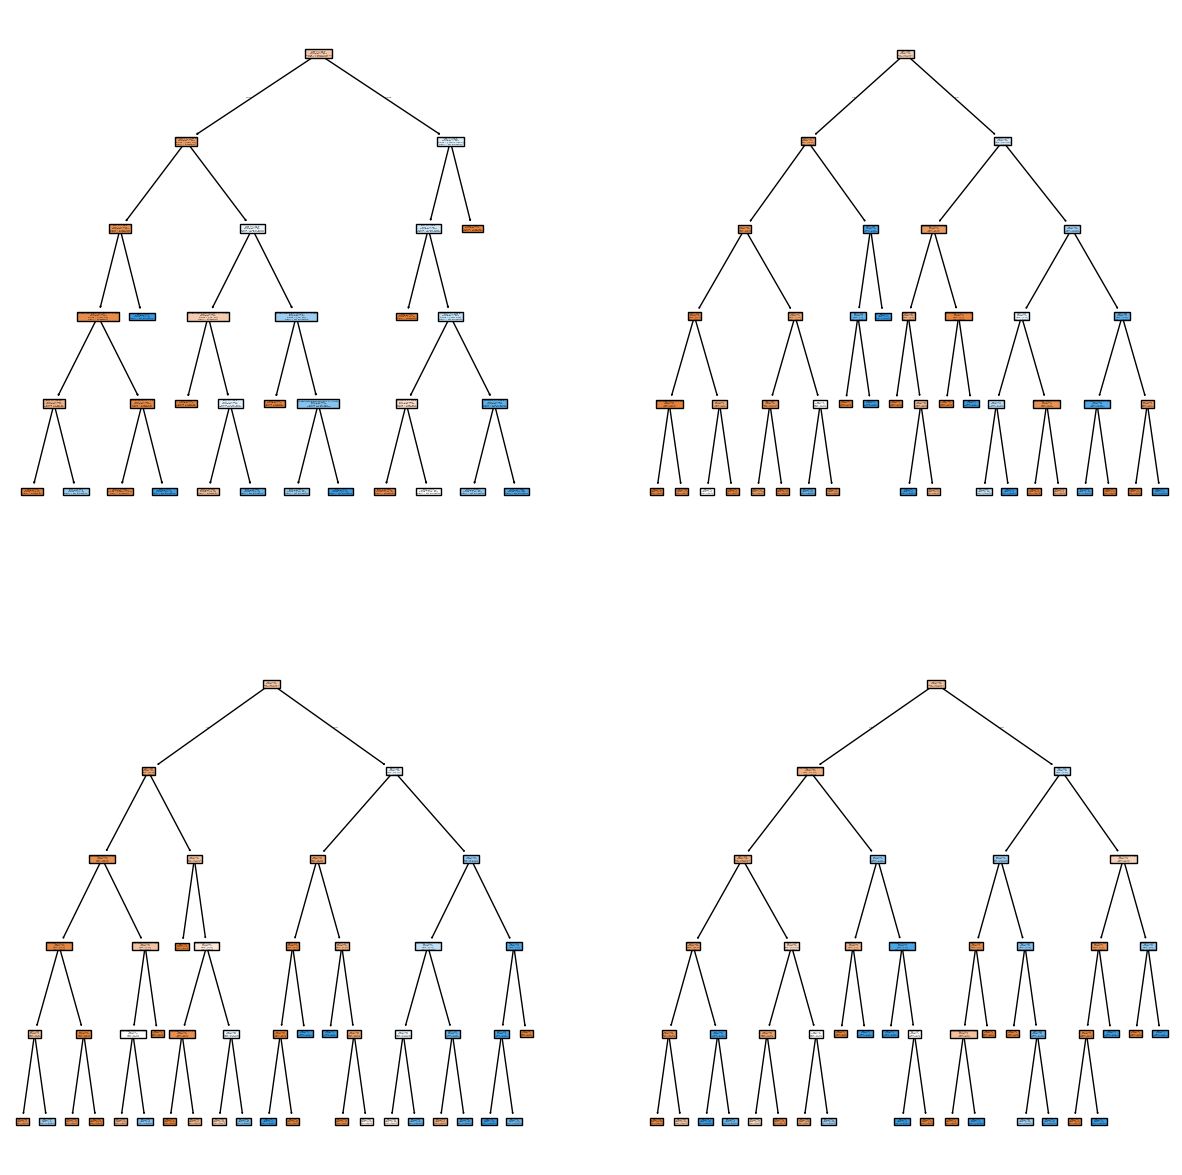

In [31]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 200 generados (por defecto)
clases = ["Diabetico", "No Diabetico"]
tree.plot_tree(second_model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(second_model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(second_model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(second_model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)

plt.show()

In [32]:
# predicción
y_pred_test_2 = second_model.predict(X_test)
y_pred_test_2

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [33]:
y_pred_train_2 = second_model.predict(X_train)
y_pred_train_2

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [35]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test_2)
accuracy_train = accuracy_score(y_train, y_pred_train_2)

f1_score_test = f1_score(y_test, y_pred_test_2, average='micro')
f1_score_train = f1_score(y_train, y_pred_train_2, average='micro')

precision_test = precision_score(y_test, y_pred_test_2, average='micro')
precision_train = precision_score(y_train, y_pred_train_2, average='micro')

recall_test = recall_score(y_test, y_pred_test_2, average='micro')
recall_train = recall_score(y_train, y_pred_train_2, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("\nAccuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7905405405405406
F1 score Test:  0.7905405405405406
Precision Test:  0.7905405405405406
Recall Test:  0.7905405405405406

Accuracy Train:  0.856418918918919
F1 score Train:  0.856418918918919
Precision Train:  0.856418918918919
Recall Train:  0.856418918918919


In [36]:
print(classification_report(y_test, y_pred_test_2, target_names=["Diabetico", "No Diabetico"]))

              precision    recall  f1-score   support

   Diabetico       0.86      0.85      0.86       108
No Diabetico       0.61      0.62      0.62        40

    accuracy                           0.79       148
   macro avg       0.73      0.74      0.74       148
weighted avg       0.79      0.79      0.79       148



In [28]:
dump(second_model, open("random_forest_classifier_200_16.sav", "wb"))

### Probamos un Random Forest con un GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],       # Número de árboles
    'max_depth': [None, 10, 20],          # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],      # Mínimo de muestras para dividir un nodo
    'max_features': ['sqrt', 'log2'],     # Número de features para dividir nodos
    'bootstrap': [True, False]            # Muestreo con/sin reemplazo
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=16),
    param_grid=param_grid,
    cv=5,                                  # 5-fold cross-validation
    scoring='accuracy',                    # Métrica a optimizar (puede ser 'f1', 'recall', etc.)
    n_jobs=-1                             # Usar todos los núcleos del CPU
)

In [38]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=16), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_     
best_model = grid_search.best_estimator_    # Modelo ya entrenado con los mejores parámetros

print('Mejores parametros:',best_params)
print('\nMejor model:',best_model)

Mejores parametros: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

Mejor model: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=16)


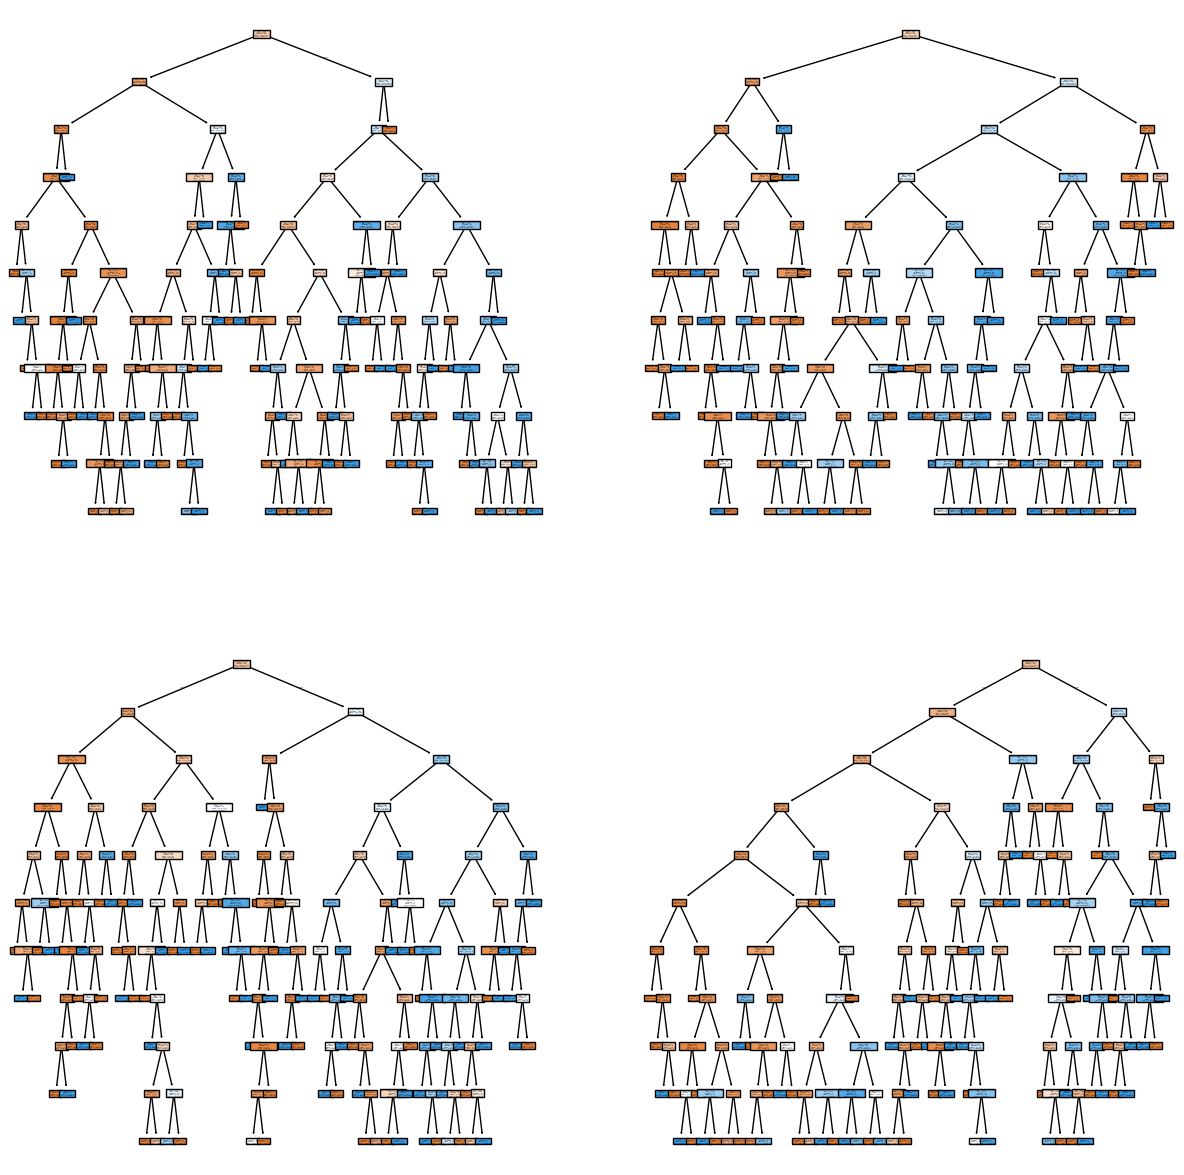

In [45]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 200 generados (por defecto)
clases = ["Diabetico", "No Diabetico"]
tree.plot_tree(best_model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(best_model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(best_model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(best_model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)

plt.show()

In [47]:
# predicción
y_pred_test_b = best_model.predict(X_test)
y_pred_test_b

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [48]:
y_pred_train_b = best_model.predict(X_train)
y_pred_train_b

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [49]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test_b)
accuracy_train = accuracy_score(y_train, y_pred_train_b)

f1_score_test = f1_score(y_test, y_pred_test_b, average='micro')
f1_score_train = f1_score(y_train, y_pred_train_b, average='micro')

precision_test = precision_score(y_test, y_pred_test_b, average='micro')
precision_train = precision_score(y_train, y_pred_train_b, average='micro')

recall_test = recall_score(y_test, y_pred_test_b, average='micro')
recall_train = recall_score(y_train, y_pred_train_b, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("\nAccuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7905405405405406
F1 score Test:  0.7905405405405406
Precision Test:  0.7905405405405406
Recall Test:  0.7905405405405406

Accuracy Train:  0.9949324324324325
F1 score Train:  0.9949324324324325
Precision Train:  0.9949324324324325
Recall Train:  0.9949324324324325


In [ ]:
dump(second_model, open("random_forest_classifier_Gridsearch_16.sav", "wb"))